### 데이터 다운받기
- cifar10 데이터셋
    - 총 10개의 class(분류)를 다루는 이미지 데이터.
    - MNIST와 마찬가지로 기본 데이터 셋.
    - 상대적으로 복잡도가 높기 때문에 성능은 기대하기 어려움.
    - https://www.cs.toronto.edu/~kriz/cifar.html

In [15]:
from tensorflow.keras.datasets import cifar10

# 데이터를 다운받는다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# MNIST와 동일하게 총 50,000개의 학습 데이터와 10,000개의 테스트 데이터로 구성되어 있다.
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [16]:
class_names = ['airplain', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### 데이터 그려보기

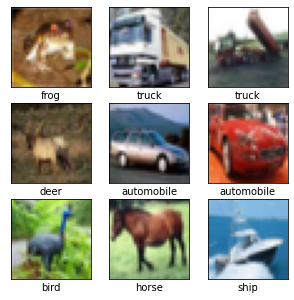

In [17]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

sample_size = 9
random_idx = np.random.randint(60000, size = sample_size)

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [18]:
# 이미지의 가로 픽셀 수
len(x_train[0])

32

In [19]:
# 이미지의 세로 픽셀 수
len(x_train[0][0])

32

In [20]:
# 이미지의 RBG 채널. (0 - 255 사이의 값)
len(x_train[0][0][0])

3

### 전처리 (1)
- 색상에 대한 평균과 표준 편차는 채널별로 처리

In [21]:
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

#### 데이터의 범위를 조절
- 대량의 데이터를 처리할 때 데이터의 범위를 일치시키거나 분포를 유사하게 만들어 주는 작업(정규화)
- 평균 정규화: (x - 평균) / 표준편차
- 중앙값 정규화: (x - 중앙값) / 표준편차
- 각 요소의 값에서 평균을 뺀 다음 표준편차로 나누어준다. 정규화는 데이터의 범위를 0과 1로 변환하여 데이터 분포를 조정하는 방법이다. (해당값 - 최소값) / (최대값 - 최소값)을 해주면 된다.
- 데이터가 큰 범위의 정수인 경우 0-1 사이로 재조절하기 위해 사용함.

In [22]:
x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

### 전처리 (2) 
- 훈련데이터와 테스트 데이터로 분할하기

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)
print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


### 학습을 위한 모델 구성하기

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()

In [25]:
# (32, 32, 3)의 데이터를 입력으로 받는다. -> (가로, 세로, 색상채널수)
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))    # 마지막 filters 128 의 2배
model.add(Dense(10, activation = 'softmax'))  # 10개의 출력을 가지는 신경망

### 컴파일

In [26]:
model.compile(optimizer = Adam(1e-4),     # 학습률 미세조정 1e-4 = 0.0001
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

### 모델 학습하기

In [27]:
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))

Epoch 1/10
1094/1094 [==============================] - 239s 219ms/step - loss: 1.6213 - acc: 0.4150 - val_loss: 1.3375 - val_acc: 0.5154
Epoch 2/10
1094/1094 [==============================] - 228s 209ms/step - loss: 1.2408 - acc: 0.5608 - val_loss: 1.1509 - val_acc: 0.5904
Epoch 3/10
1094/1094 [==============================] - 231s 211ms/step - loss: 1.0554 - acc: 0.6297 - val_loss: 1.0104 - val_acc: 0.6433
Epoch 4/10
1094/1094 [==============================] - 246s 225ms/step - loss: 0.9284 - acc: 0.6789 - val_loss: 0.9663 - val_acc: 0.6623
Epoch 5/10
1094/1094 [==============================] - 233s 213ms/step - loss: 0.8283 - acc: 0.7148 - val_loss: 0.8751 - val_acc: 0.6939
Epoch 6/10
1094/1094 [==============================] - 247s 225ms/step - loss: 0.7417 - acc: 0.7459 - val_loss: 0.8205 - val_acc: 0.7160
Epoch 7/10
1094/1094 [==============================] - 231s 211ms/step - loss: 0.6696 - acc: 0.7697 - val_loss: 0.8337 - val_acc: 0.7087
Epoch 8/10
1094/1094 [============

### 학습 결과 시각화

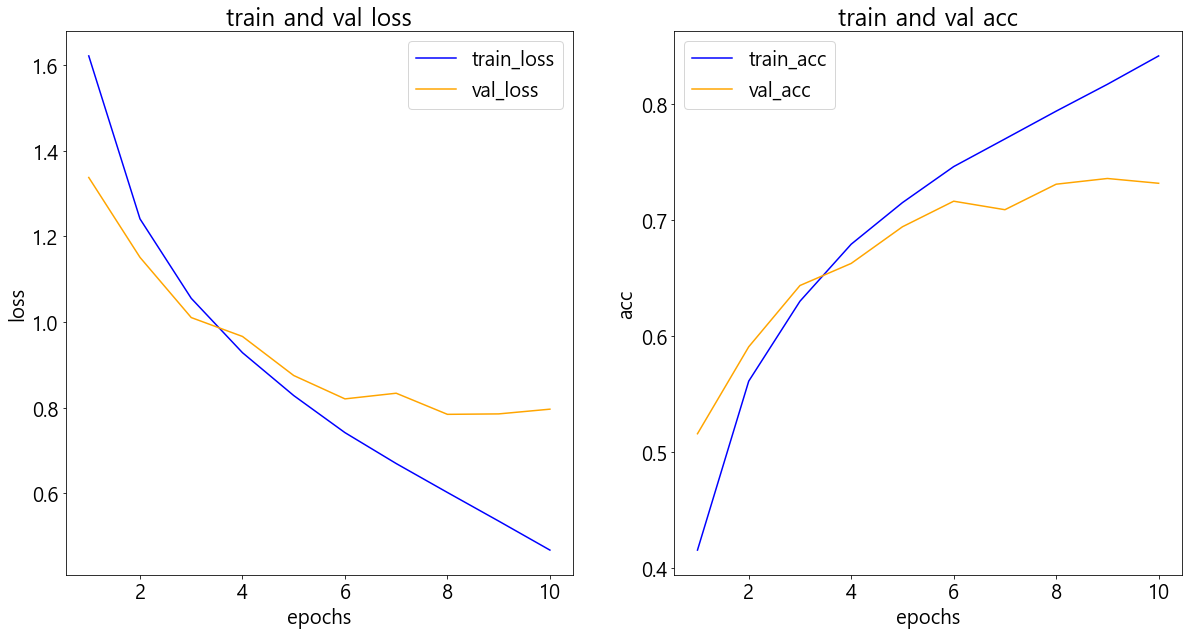

In [28]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (20, 10)

hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (20, 10))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2,)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

### 신경망 시각화

<ipython-input-29-9ecd495d92c6>:28: RuntimeWarning: invalid value encountered in true_divide
  x -= x.mean(); x /= x.std()


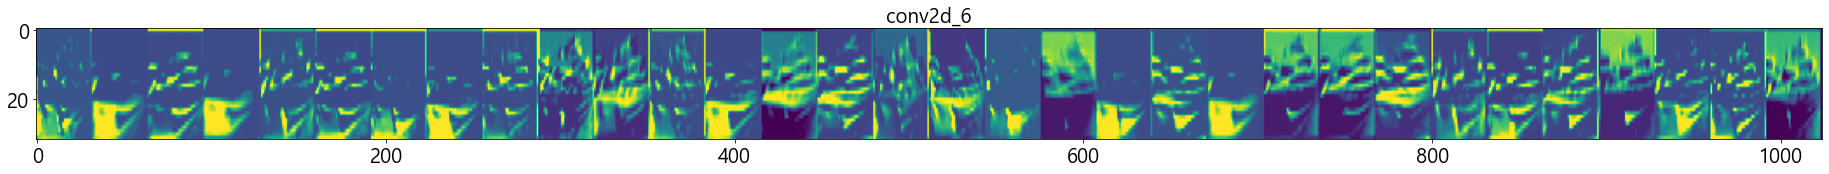

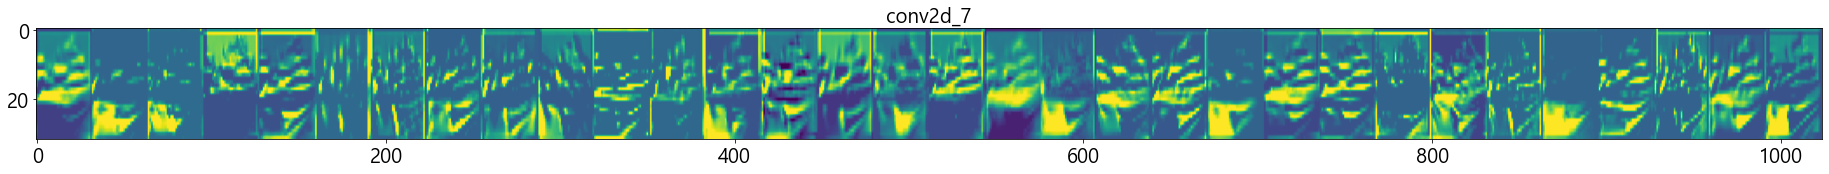

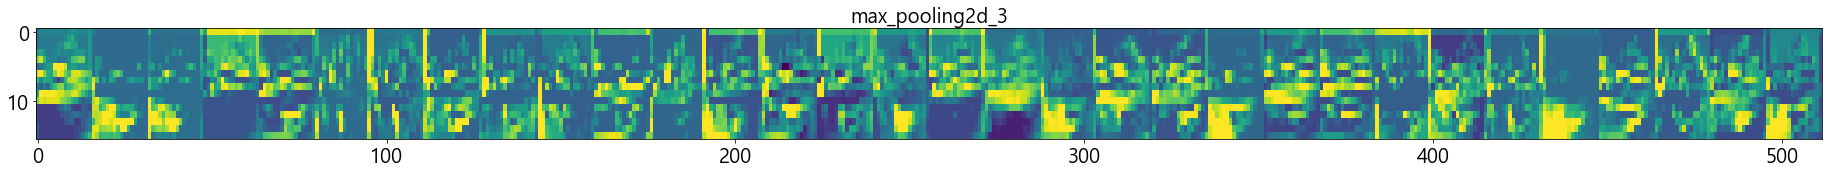

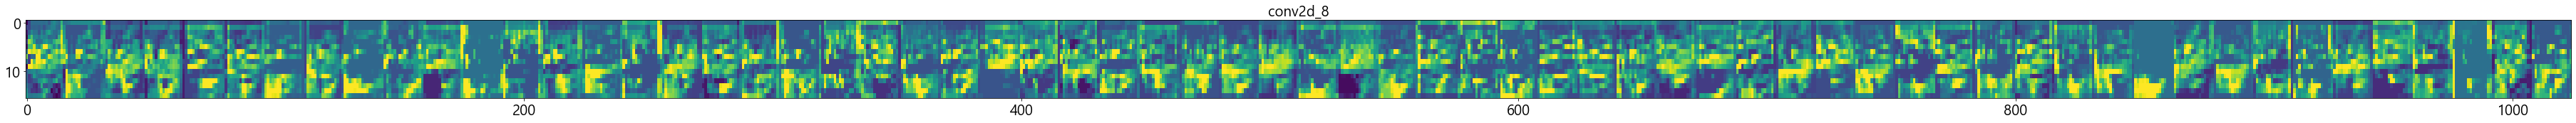

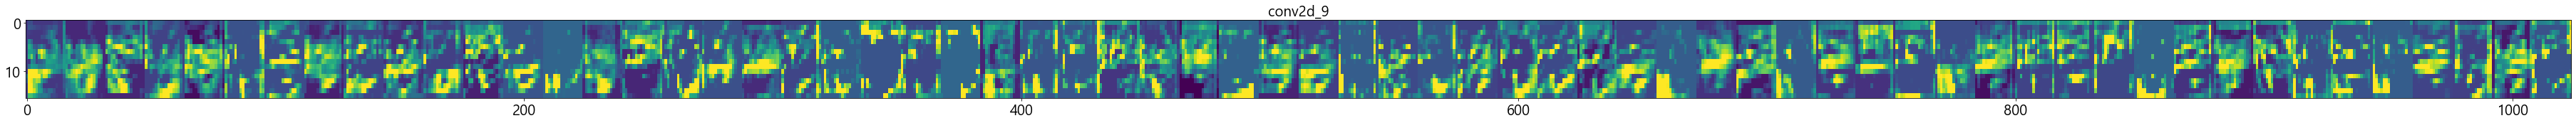

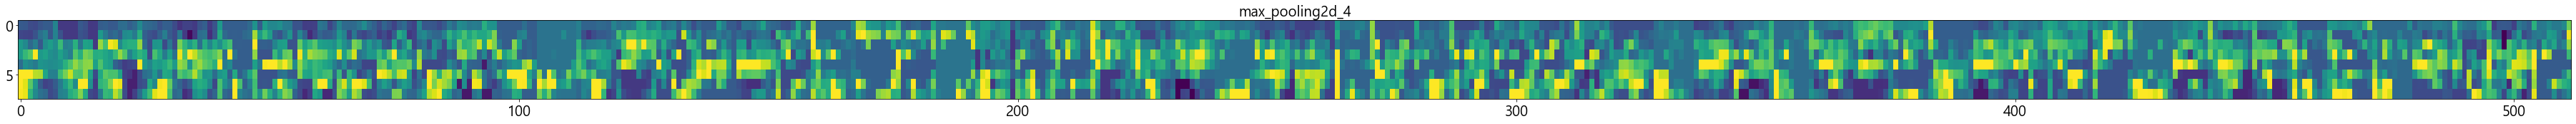

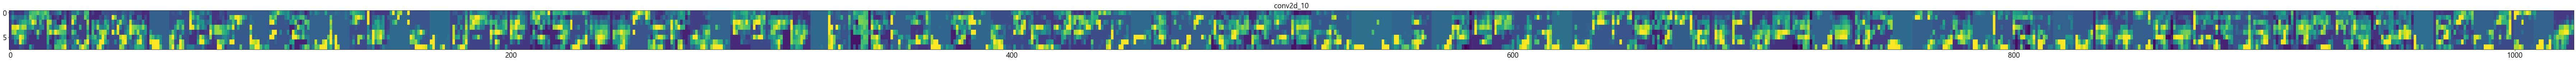

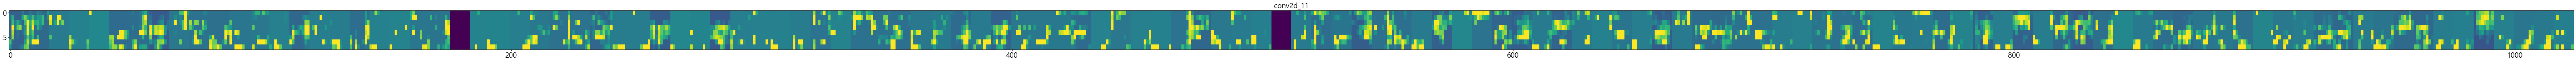

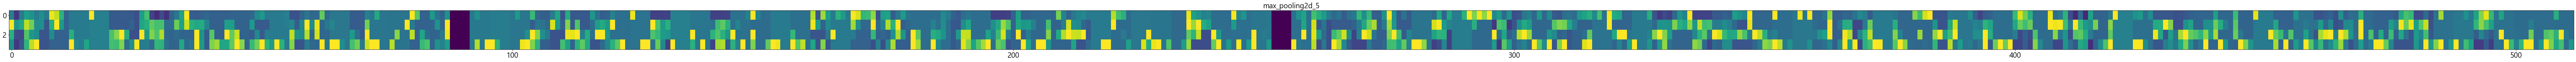

In [29]:
import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

# 모델 전체에서 output을 가져올 수 있다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output)

# 데이터셋의 두 번째 데이터는 '배'이다
test_img = np.expand_dims(x_test[1], axis = 0)
feature_maps = visual_model.predict(test_img)

# zip: 같은 길이의 두 리스트를 같은 인덱스끼리 잘라서 리스트로 반환
for layer_name, feature_map in zip(get_layer_name, feature_maps):
    # Dense층은 제외한다.
    if(len(feature_map.shape) == 4):
        img_size = feature_map.shape[1]
        features = feature_map.shape[-1]
        
        # (img_size, img_size)의 feature_map이 features 개수만큼 존재한다.
        # np.zeros: 데이터를 0값으로 채운다. 배열의 사이즈를 잡아주었다.
        # features: 조각을 몇 번 냈는지....
        display_grid = np.zeros((img_size, img_size * features))
        
        # 각 특징맵을 display_grid 배열에 이어 붙인다.
        for i in range(features):
            x = feature_map[0, :, :, i]
            x -= x.mean(); x /= x.std()
            x *= 64; x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * img_size : (i + 1) * img_size] = x
            
        plt.figure(figsize = (features, 2 + 1./features))
        plt.title(layer_name, fontsize = 20)
        plt.grid(False)
        plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')